In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
df = pd.read_csv('sample_data/life expectancy.csv')

df.describe()



,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
count,3306.000000,3118.000000,2622.000000,3.154000e+03,3126.000000,2216.000000,3002.000000,975.000000,2059.000000,3.306000e+03,3.306000e+03,3.306000e+03
mean,2010.000000,69.748362,10.663654,1.574924e+05,6.364059,4.589014,7.890760,2.860513,52.738785,1.318219e+06,4.686289e+06,7.392488e+06
std,5.478054,9.408154,11.285897,7.726415e+05,2.842844,2.119165,6.270832,0.621343,30.126762,5.214068e+06,1.843727e+07,2.932688e+07
min,2001.000000,40.369000,2.500000,1.000000e+01,1.263576,0.850320,0.100000,1.000000,2.377647,4.304900e+02,3.301600e+02,2.481820e+03
25%,2005.000000,63.642000,2.500000,2.002500e+03,4.205443,3.136118,3.733000,2.500000,24.746007,6.245688e+04,5.776475e+04,3.184758e+05
50%,2010.000000,72.168500,6.200000,1.020500e+04,5.892352,4.371465,5.920000,3.000000,49.317481,2.456910e+05,3.147693e+05,1.350146e+06
75%,2015.000000,76.809000,14.775000,5.877250e+04,8.119166,5.519825,10.097500,3.250000,80.278847,8.465591e+05,2.831636e+06,3.918468e+06
max,2019.000000,84.356341,70.900000,1.070722e+07,24.230680,23.270000,37.250000,4.500000,100.000004,5.563676e+07,2.685646e+08,3.246378e+08


In [35]:
# Check for missing values and fill them
df.fillna(df.mean(), inplace=True)

# Data Standardization for clustering
features = ['Life Expectancy World Bank', 'Health Expenditure %', 'Education Expenditure %']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Combine Health and Education expenditures and calculate as a percentage of GDP
df['Combined_Expenditure_%'] = df['Health Expenditure %'] + df['Education Expenditure %']

df['Combined_Expenditure_%']


<ipython-input-35-39b2f2f3f06b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


0       10.953073
1        9.072530
2       10.598224
3       10.454953
4        7.073385
          ...    
3301     5.138227
3302    11.069344
3303    15.027065
3304     9.777383
3305    12.292579
Name: Combined_Expenditure_%, Length: 3306, dtype: float64

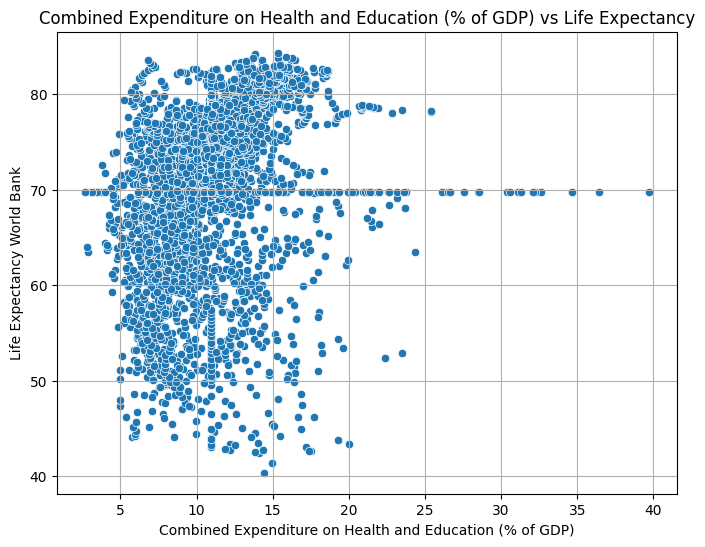

In [25]:
# Plot the relationship between combined expenditure and Life Expectancy
def plot_combined_expenditure_vs_life_expectancy(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Combined_Expenditure_%', y='Life Expectancy World Bank', data=data)
    plt.title('Combined Expenditure on Health and Education (% of GDP) vs Life Expectancy')
    plt.xlabel('Combined Expenditure on Health and Education (% of GDP)')
    plt.ylabel('Life Expectancy World Bank')
    plt.grid(True)
    plt.show()

plot_combined_expenditure_vs_life_expectancy(df)

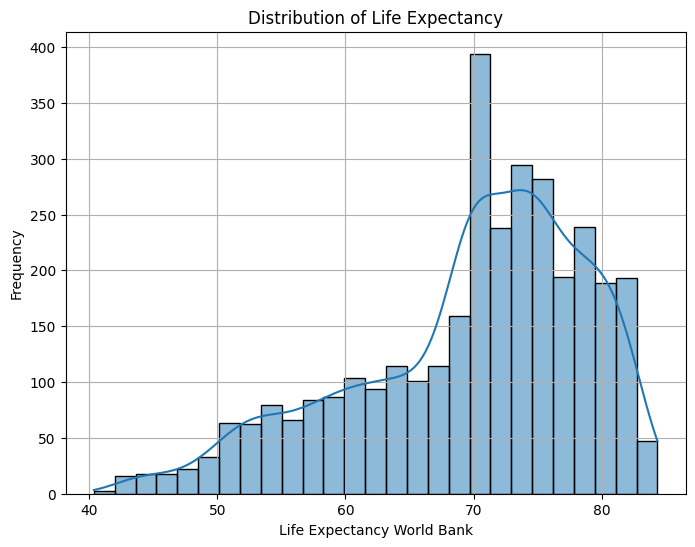

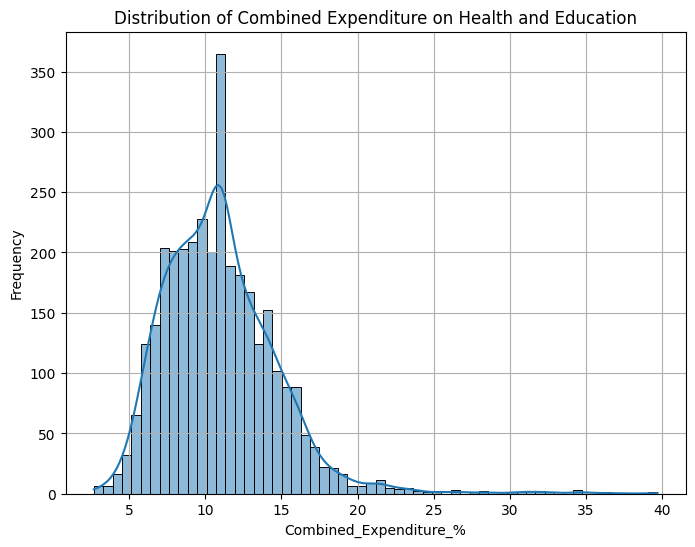

In [26]:
# Function to plot the distribution of a single variable
def plot_distribution(data, title):
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=True)
    plt.title(title)
    plt.xlabel(data.name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotting the distribution of life expectancy
plot_distribution(df['Life Expectancy World Bank'], 'Distribution of Life Expectancy')
plot_distribution(df['Combined_Expenditure_%'], 'Distribution of Combined Expenditure on Health and Education')


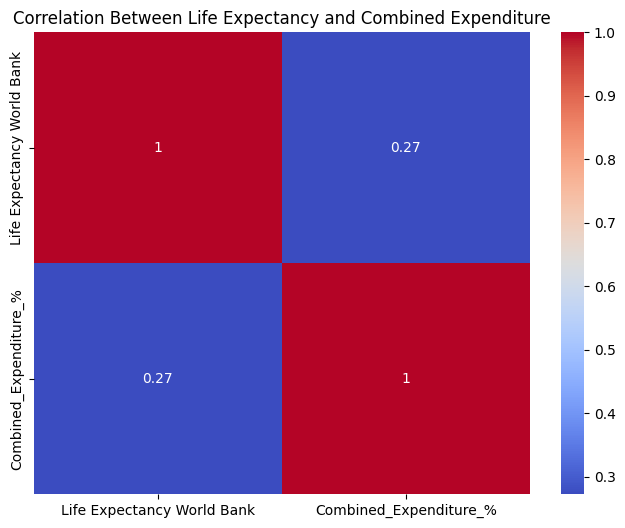

In [27]:
# Correlation heatmap for Life Expectancy and Expenditure
def plot_correlation_heatmap(data, columns, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(data[columns].corr(), annot=True, cmap='coolwarm')
    plt.title(title)
    plt.show()


# Choose columns to correlate
columns_to_correlate = ['Life Expectancy World Bank', 'Combined_Expenditure_%']
plot_correlation_heatmap(df, columns_to_correlate, 'Correlation Between Life Expectancy and Combined Expenditure')

In [28]:
# Determine the optimal number of clusters using the elbow and silhouette methods
def plot_elbow_silhouette(data):
    silhouette_avg_scores = []
    wcss = []  # Within-cluster sum of squares

    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=10)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_avg_scores.append(score)

    plt.figure(figsize=(14, 7))

    # Elbow Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), wcss, 'o-', color='red')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)

    # Silhouette Plot
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_avg_scores, 'o-', color='blue')
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Finding the optimal number of clusters
    optimal_clusters = silhouette_avg_scores.index(max(silhouette_avg_scores)) + 2
    print(f"Optimal number of clusters based on silhouette score is: {optimal_clusters}")

    return optimal_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

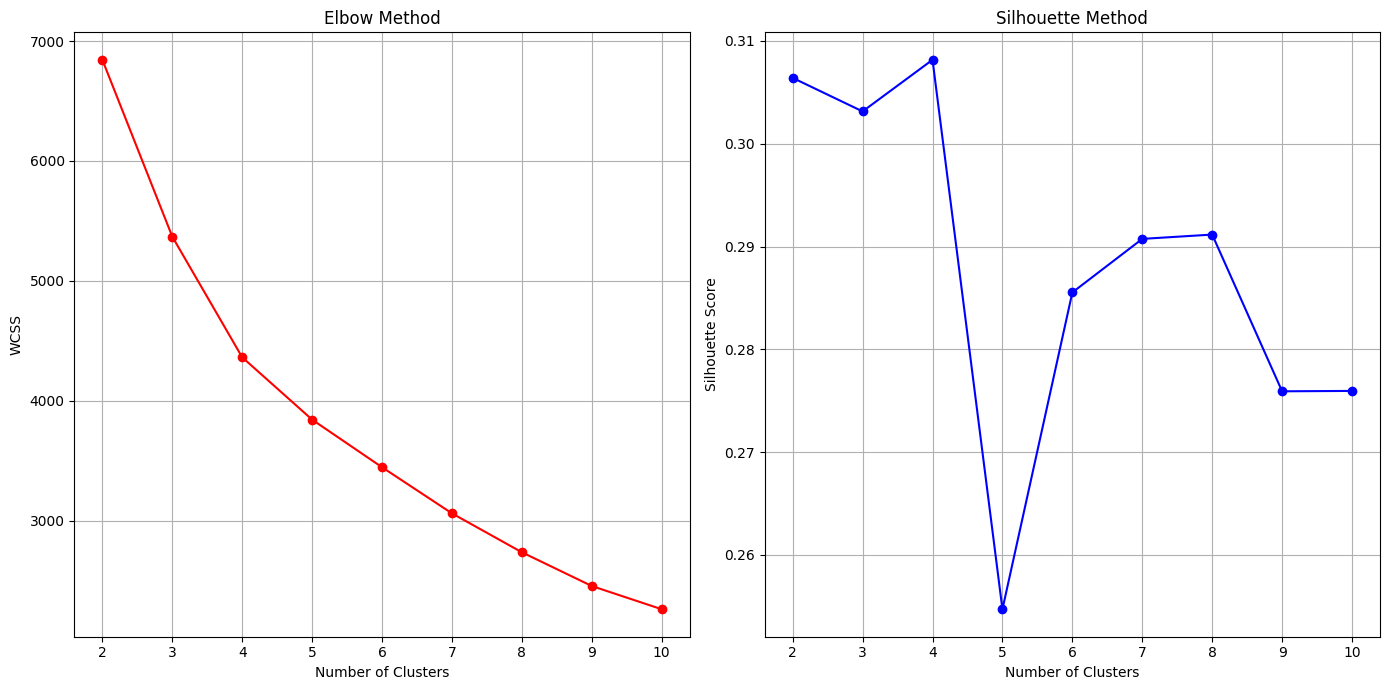

Optimal number of clusters based on silhouette score is: 4


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
# Call the function to plot the elbow and silhouette graphs
optimal_clusters = plot_elbow_silhouette(df_scaled)

# Clustering with the optimal number of clusters found
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)




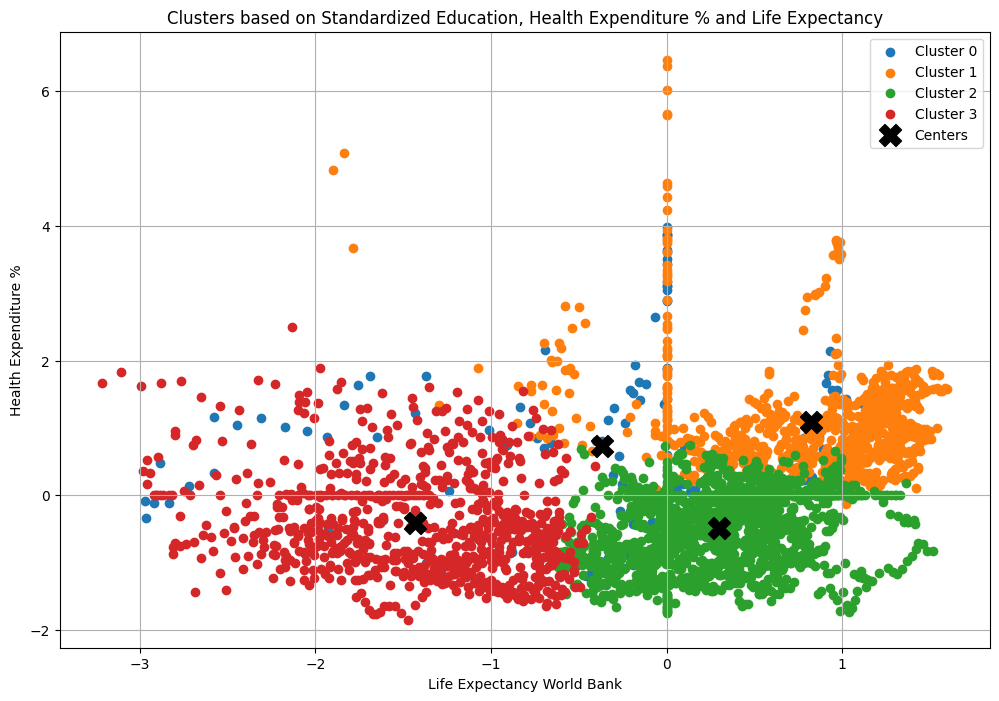

From the silhouette analysis, we have determined the optimal number of clusters for our data.
The resulting clusters are visualized in a scatter plot with cluster centers marked.
This visualization helps us understand the relationship between education expenditure and life expectancy across different clusters.
For instance, Cluster A may represent countries with higher life expectancy and higher education spending.
These insights can guide policy decisions in areas such as public health and education funding.


In [30]:
# Plotting clusters with detailed information
def plot_detailed_clusters(data, cluster_labels, centers, feature_names):
    plt.figure(figsize=(12, 8))
    # Assign cluster data
    unique_labels = np.unique(cluster_labels)
    for label in unique_labels:
        cluster_data = data[cluster_labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}')

    # Plot cluster centers
    plt.scatter(centers[:, 0], centers[:, 1], s=250, c='black', label='Centers', marker='X')
    plt.title('Clusters based on Standardized Education, Health Expenditure % and Life Expectancy')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot the clusters with detailed annotations
plot_detailed_clusters(df_scaled, df['Cluster'], kmeans.cluster_centers_, features)

# Narrative
print("From the silhouette analysis, we have determined the optimal number of clusters for our data.")
print("The resulting clusters are visualized in a scatter plot with cluster centers marked.")
print("This visualization helps us understand the relationship between education expenditure and life expectancy across different clusters.")
print("For instance, Cluster A may represent countries with higher life expectancy and higher education spending.")
print("These insights can guide policy decisions in areas such as public health and education funding.")

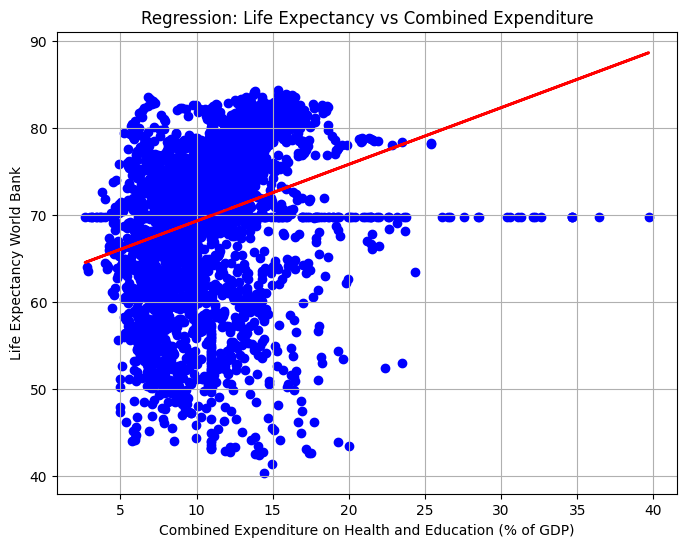

Coefficient (Slope): 0.6513029752245633
Intercept: 62.78544831622348
The line of best fit represents a model of life expectancy as predicted by education expenditure.
Higher education expenditure is generally associated with higher life expectancy, as indicated by the positive slope of the line.
This trend suggests that investment in education may be an effective strategy for improving public health outcomes.


In [31]:
# Linear regression fit on Life Expectancy vs Combined Expenditure
def regression_fit_combined_expenditure(data):
    X = data[['Combined_Expenditure_%']]  # Predictor
    y = data['Life Expectancy World Bank']  # Response

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Create a scatter plot with the regression line
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue')
    plt.plot(X, regressor.predict(X), color='red', linewidth=2)
    plt.title('Regression: Life Expectancy vs Combined Expenditure')
    plt.xlabel('Combined Expenditure on Health and Education (% of GDP)')
    plt.ylabel('Life Expectancy World Bank')
    plt.grid(True)
    plt.show()

    # Output the regression coefficients
    print(f"Coefficient (Slope): {regressor.coef_[0]}")
    print(f"Intercept: {regressor.intercept_}")


regression_fit_combined_expenditure(df)

# Narrative
print("The line of best fit represents a model of life expectancy as predicted by education expenditure.")
print("Higher education expenditure is generally associated with higher life expectancy, as indicated by the positive slope of the line.")
print("This trend suggests that investment in education may be an effective strategy for improving public health outcomes.")
